In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from scipy.stats import pearsonr
plt.style.use('ggplot')


In [2]:
#load the data
df = pd.read_csv("../Data/nba-stats-first2seasons.csv")

In [3]:
df.shape

(1325, 75)

In [4]:
df = df.dropna().reset_index(drop=True)

In [5]:
df.shape

(1065, 75)

In [6]:
df.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Player', 'G', 'GS', 'MP', 'FG', 'FGA',
       '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%',
       'TS%', 'Age_diff', 'Age_avg', 'G_diff', 'G_avg', 'GS_diff', 'GS_avg',
       'MP_diff', 'MP_avg', 'FG_diff', 'FG_avg', 'FGA_diff', 'FGA_avg',
       '2P_diff', '2P_avg', '2PA_diff', '2PA_avg', '3P_diff', '3P_avg',
       '3PA_diff', '3PA_avg', 'FT_diff', 'FT_avg', 'FTA_diff', 'FTA_avg',
       'ORB_diff', 'ORB_avg', 'DRB_diff', 'DRB_avg', 'TRB_diff', 'TRB_avg',
       'AST_diff', 'AST_avg', 'STL_diff', 'STL_avg', 'BLK_diff', 'BLK_avg',
       'TOV_diff', 'TOV_avg', 'PF_diff', 'PF_avg', 'PTS_diff', 'PTS_avg',
       'all_star', 'rising_star'],
      dtype='object')

In [7]:
df.describe()

,Age,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,...,BLK_diff,BLK_avg,TOV_diff,TOV_avg,PF_diff,PF_avg,PTS_diff,PTS_avg,all_star,rising_star
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,...,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,22.063850,49.143662,15.518310,16.335775,2.243192,5.261315,1.825822,3.970329,0.418779,1.289484,...,0.000939,0.312207,0.035117,1.037089,0.023474,1.654460,0.063286,6.585540,0.104225,0.172770
std,2.076465,23.770421,22.538686,8.107771,1.474098,3.202951,1.333539,2.734983,0.448854,1.221026,...,0.222298,0.351081,0.533173,0.643570,0.675910,0.730557,3.521872,4.185644,0.305696,0.378226
min,18.000000,2.000000,0.000000,2.800000,0.000000,0.700000,0.000000,0.300000,0.000000,0.000000,...,-1.100000,0.000000,-3.000000,0.050000,-2.300000,0.000000,-13.500000,0.350000,0.000000,0.000000
25%,21.000000,29.000000,0.000000,10.000000,1.200000,3.000000,0.900000,2.000000,0.100000,0.300000,...,-0.100000,0.100000,-0.300000,0.600000,-0.400000,1.100000,-2.000000,3.500000,0.000000,0.000000
50%,22.000000,51.000000,4.000000,15.300000,1.800000,4.400000,1.400000,3.200000,0.300000,1.000000,...,0.000000,0.200000,0.000000,0.900000,0.000000,1.600000,0.000000,5.500000,0.000000,0.000000
75%,23.000000,72.000000,22.000000,21.400000,3.000000,6.800000,2.400000,5.200000,0.600000,2.000000,...,0.100000,0.400000,0.400000,1.300000,0.400000,2.150000,2.000000,8.450000,0.000000,0.000000
max,35.000000,82.000000,82.000000,39.700000,8.600000,18.900000,8.600000,16.500000,2.500000,7.100000,...,1.500000,2.500000,2.300000,4.300000,2.300000,4.150000,12.000000,24.950000,1.000000,1.000000


  '2P%', '3P%', 'eFG%', 'FT%',
       'TS%', 'Age_diff', 'Age_avg', 'G_diff', 'G_avg', 'GS_diff', 'GS_avg',
       'MP_diff', 'MP_avg', 'FG_diff', 'FG_avg', 'FGA_diff', 'FGA_avg',
       '2P_diff', '2P_avg', '2PA_diff', '2PA_avg', '3P_diff', '3P_avg',
       '3PA_diff', '3PA_avg', 'FT_diff', 'FT_avg', 'FTA_diff', 'FTA_avg',
       'ORB_diff', 'ORB_avg', 'DRB_diff', 'DRB_avg', 'TRB_diff', 'TRB_avg',
       'AST_diff', 'AST_avg', 'STL_diff', 'STL_avg', 'BLK_diff', 'BLK_avg',
       'TOV_diff', 'TOV_avg', 'PF_diff', 'PF_avg', 'PTS_diff', 'PTS_avg',
       'all_star', 'rising_star'

In [9]:
print(df['all_star'].value_counts())

0    954
1    111
Name: all_star, dtype: int64


In [19]:
df = df.astype({"all_":'category'})

NameError: name 'categorical' is not defined

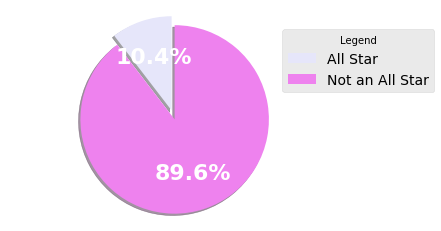

In [11]:
# plotting original data
labels = 'All Star', 'Not an All Star'
btc_1 = [sum(df.all_star), (df.all_star == 0).sum(axis=0)]
explode = (0.1, 0)

colors = ['lavender', 'violet']

fig, ax = plt.subplots()
ax.pie(btc_1, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 22, 'weight':"bold"})
ax.axis('equal') # ensures chart is a circle

ax.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

plt.show()


## G (Games Played)

In [12]:
df.G.describe()

count    1065.000000
mean       49.143662
std        23.770421
min         2.000000
25%        29.000000
50%        51.000000
75%        72.000000
max        82.000000
Name: G, dtype: float64

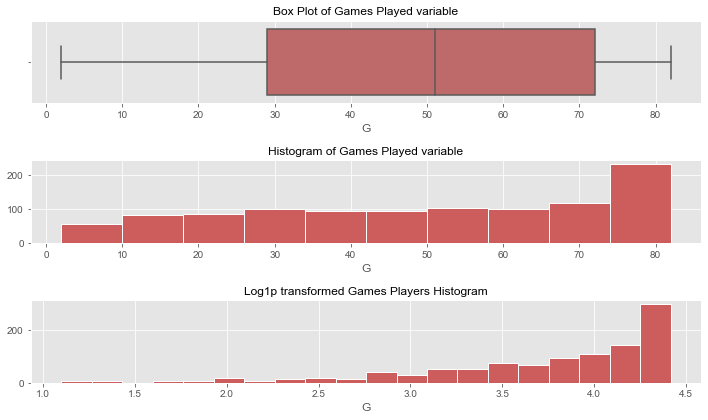

In [13]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.G, ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Games Played variable")
sns.distplot(a=df.G, kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Games Played variable")
sns.distplot(a=np.log1p(df.G), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Games Players Histogram")
f.tight_layout()

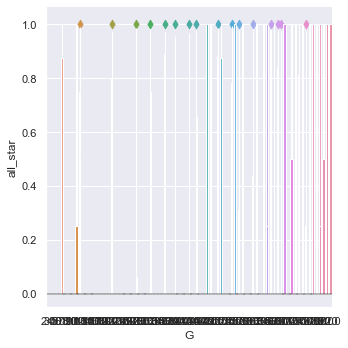

In [17]:
sns.catplot(x="G", y="all_star", kind="boxen",
            data=df);

In [40]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['G'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['G']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.254
Pearsons correlation between belongs_to_collection and revenue: 0.201


## Games Started (GS)

In [62]:
df.GS.describe()

count    1065.000000
mean       15.518310
std        22.538686
min         0.000000
25%         0.000000
50%         4.000000
75%        22.000000
max        82.000000
Name: GS, dtype: float64

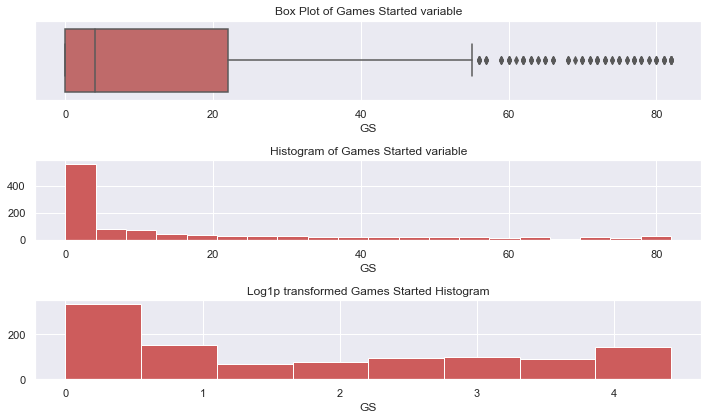

In [63]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.GS, ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Games Started variable")
sns.distplot(a=df.GS, kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Games Started variable")
sns.distplot(a=np.log1p(df.GS), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Games Started Histogram")
f.tight_layout()

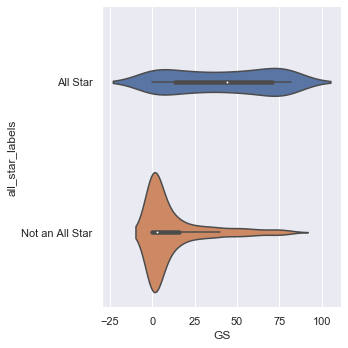

In [64]:

sns.catplot(x="GS", y="all_star_labels",
            kind="violin", data=df);

In [66]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['GS'], df['all_star'])
print('Pearsons correlation between games started and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['GS']), df['all_star'])
print('Pearsons correlation between log of games started and revenue: %.3f' % corr)

Pearsons correlation between games started and revenue: 0.388
Pearsons correlation between log of games started and revenue: 0.303


## Minutes Played

In [67]:
df.MP.describe()

count    1065.000000
mean       16.335775
std         8.107771
min         2.800000
25%        10.000000
50%        15.300000
75%        21.400000
max        39.700000
Name: MP, dtype: float64

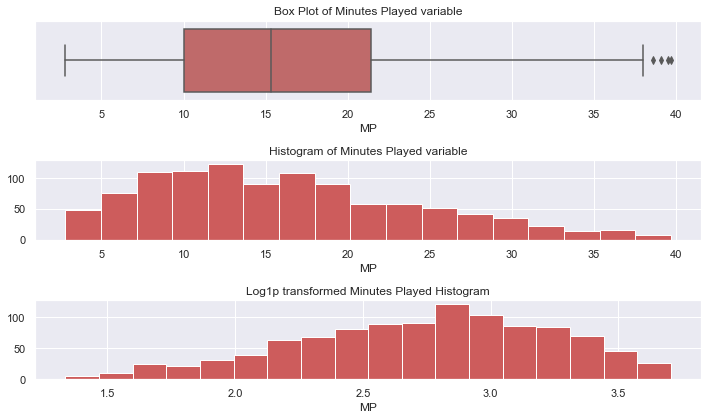

In [68]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.MP, ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Minutes Played variable")
sns.distplot(a=df.MP, kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Minutes Played variable")
sns.distplot(a=np.log1p(df.MP), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Minutes Played Histogram")
f.tight_layout()

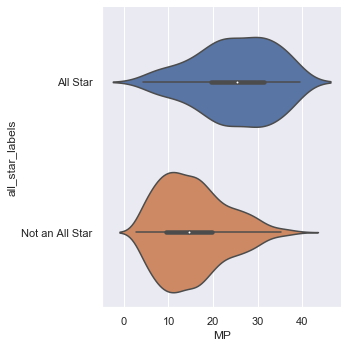

In [69]:
sns.catplot(x="MP", y="all_star_labels",
            kind="violin", data=df);

In [70]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['MP'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['MP']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.360
Pearsons correlation between belongs_to_collection and revenue: 0.303


## Field Goals Made (FG)

In [71]:
df.FG.describe()

count    1065.000000
mean        2.243192
std         1.474098
min         0.000000
25%         1.200000
50%         1.800000
75%         3.000000
max         8.600000
Name: FG, dtype: float64

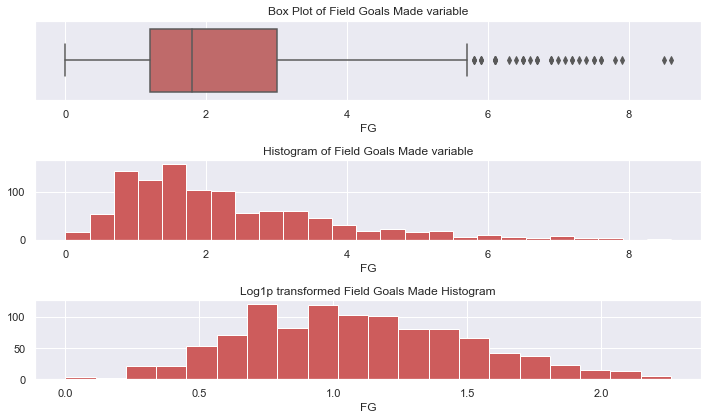

In [72]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.FG, ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Field Goals Made variable")
sns.distplot(a=df.FG, kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Field Goals Made variable")
sns.distplot(a=np.log1p(df.FG), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Field Goals Made Histogram")
f.tight_layout()

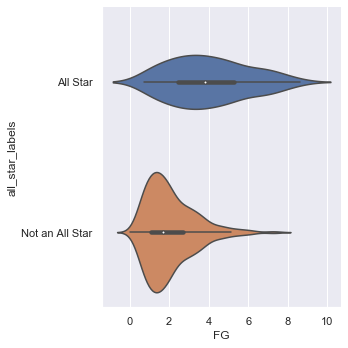

In [73]:
sns.catplot(x="FG", y="all_star_labels",
            kind="violin", data=df);

In [74]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['FG'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['FG']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.408
Pearsons correlation between belongs_to_collection and revenue: 0.358


## Field Goals Attempted (FGA)

In [75]:
df.FGA.describe()

count    1065.000000
mean        5.261315
std         3.202951
min         0.700000
25%         3.000000
50%         4.400000
75%         6.800000
max        18.900000
Name: FGA, dtype: float64

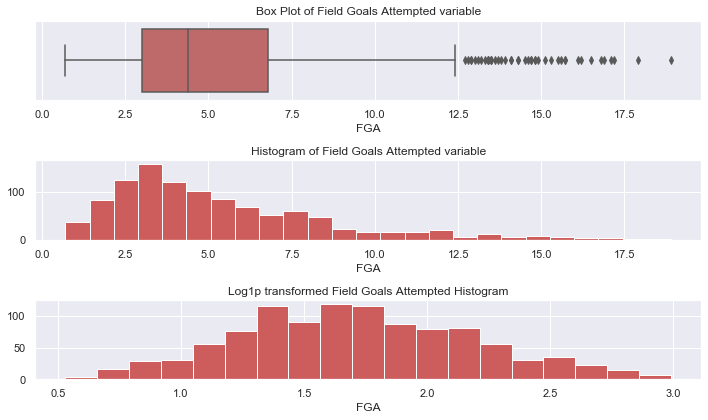

In [76]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.FGA, ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Field Goals Attempted variable")
sns.distplot(a=df.FGA, kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Field Goals Attempted variable")
sns.distplot(a=np.log1p(df.FGA), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Field Goals Attempted Histogram")
f.tight_layout()

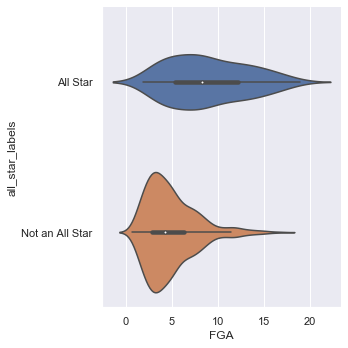

In [77]:
sns.catplot(x="FGA", y="all_star_labels",
            kind="violin", data=df);

In [78]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['FGA'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['FGA']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.385
Pearsons correlation between belongs_to_collection and revenue: 0.336


## Two pointers Made (2P)

In [80]:
df['2P'].describe()

count    1065.000000
mean        1.825822
std         1.333539
min         0.000000
25%         0.900000
50%         1.400000
75%         2.400000
max         8.600000
Name: 2P, dtype: float64

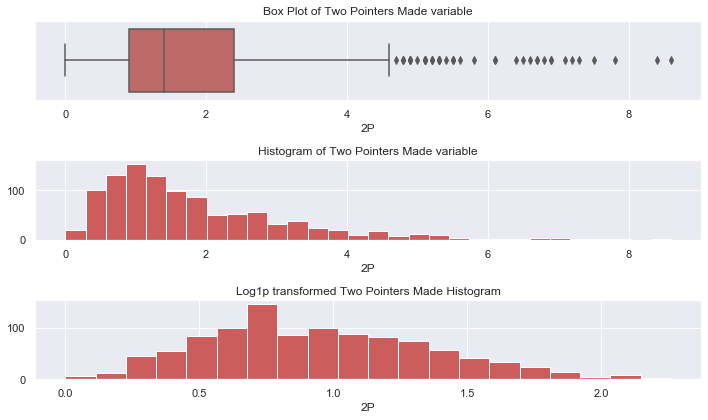

In [81]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['2P'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Two Pointers Made variable")
sns.distplot(a=df['2P'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Two Pointers Made variable")
sns.distplot(a=np.log1p(df['2P']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Two Pointers Made Histogram")
f.tight_layout()

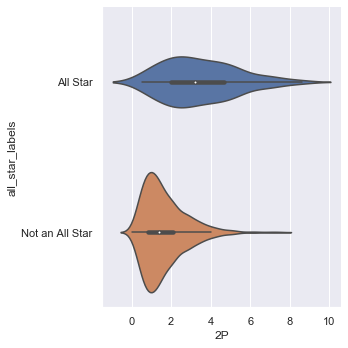

In [82]:
sns.catplot(x="2P", y="all_star_labels",
            kind="violin", data=df);

In [83]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['2P'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['2P']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.420
Pearsons correlation between belongs_to_collection and revenue: 0.373


## Two Pointers Attempted (2PA)

In [84]:
df['2PA'].describe()

count    1065.000000
mean        3.970329
std         2.734983
min         0.300000
25%         2.000000
50%         3.200000
75%         5.200000
max        16.500000
Name: 2PA, dtype: float64

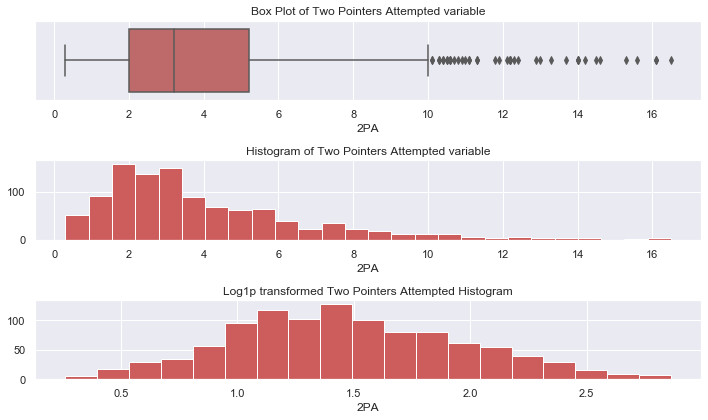

In [85]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['2PA'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Two Pointers Attempted variable")
sns.distplot(a=df['2PA'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Two Pointers Attempted variable")
sns.distplot(a=np.log1p(df['2PA']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Two Pointers Attempted Histogram")
f.tight_layout()

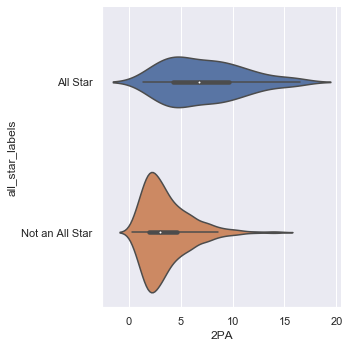

In [86]:
sns.catplot(x="2PA", y="all_star_labels",
            kind="violin", data=df);

In [87]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['2PA'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['2PA']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.411
Pearsons correlation between belongs_to_collection and revenue: 0.360


## Three Pointers Made (3P)

In [88]:
df['3P'].describe()

count    1065.000000
mean        0.418779
std         0.448854
min         0.000000
25%         0.100000
50%         0.300000
75%         0.600000
max         2.500000
Name: 3P, dtype: float64

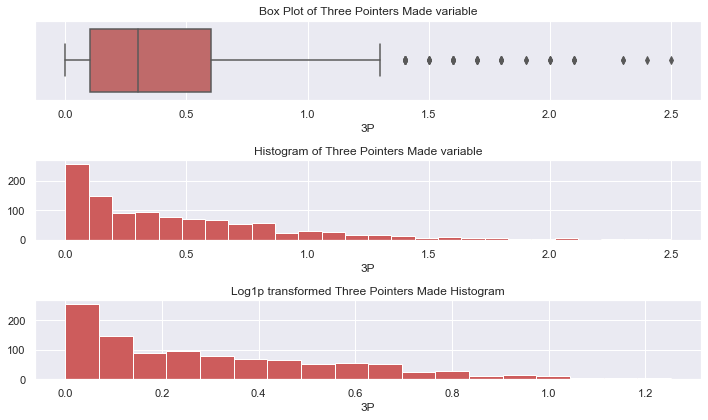

In [89]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['3P'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Three Pointers Made variable")
sns.distplot(a=df['3P'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Three Pointers Made variable")
sns.distplot(a=np.log1p(df['3P']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Three Pointers Made Histogram")
f.tight_layout()

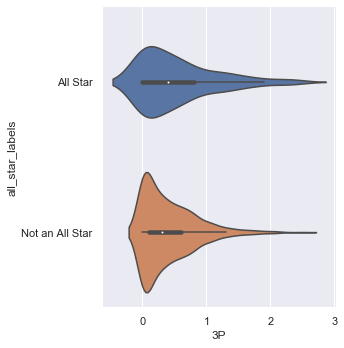

In [90]:
sns.catplot(x="3P", y="all_star_labels",
            kind="violin", data=df);

In [91]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['3P'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['3P']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.093
Pearsons correlation between belongs_to_collection and revenue: 0.074


## Thee Pointers Attempted (3PA)

In [92]:
df['3PA'].describe()

count    1065.000000
mean        1.289484
std         1.221026
min         0.000000
25%         0.300000
50%         1.000000
75%         2.000000
max         7.100000
Name: 3PA, dtype: float64

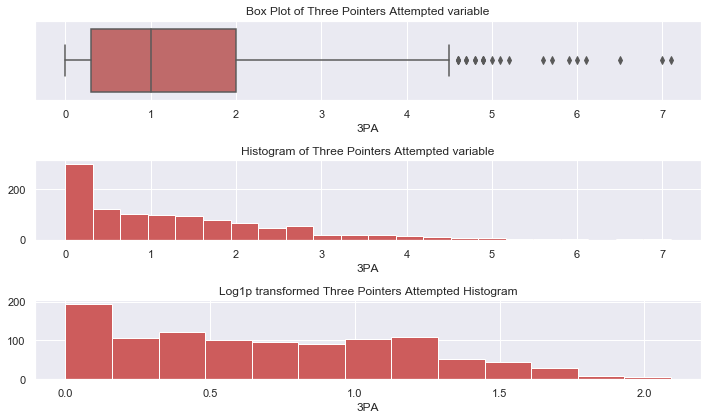

In [93]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['3PA'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Three Pointers Attempted variable")
sns.distplot(a=df['3PA'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Three Pointers Attempted variable")
sns.distplot(a=np.log1p(df['3PA']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Three Pointers Attempted Histogram")
f.tight_layout()

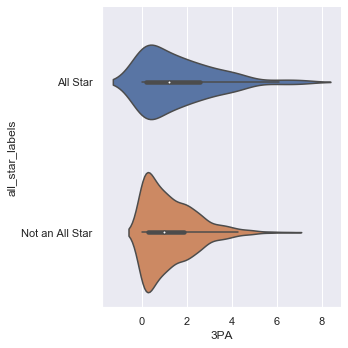

In [94]:
sns.catplot(x="3PA", y="all_star_labels",
            kind="violin", data=df);

In [95]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['3PA'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['3PA']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.091
Pearsons correlation between belongs_to_collection and revenue: 0.055


## Free Throws Made (FT)

In [96]:
df['FT'].describe()

count    1065.000000
mean        1.053427
std         0.866888
min         0.000000
25%         0.500000
50%         0.800000
75%         1.400000
max         6.200000
Name: FT, dtype: float64

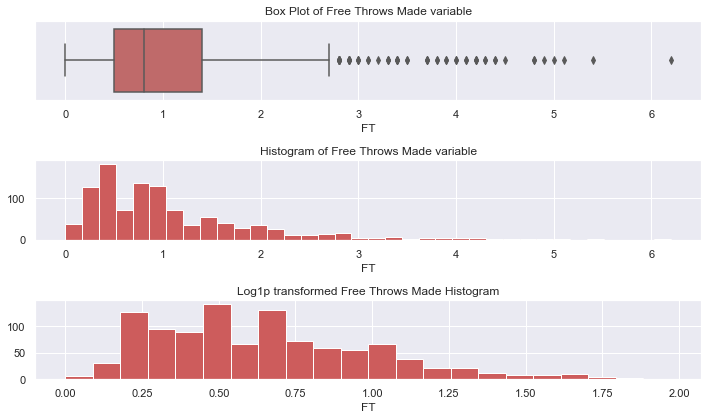

In [98]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['FT'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Free Throws Made variable")
sns.distplot(a=df['FT'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Free Throws Made variable")
sns.distplot(a=np.log1p(df['FT']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Free Throws Made Histogram")
f.tight_layout()

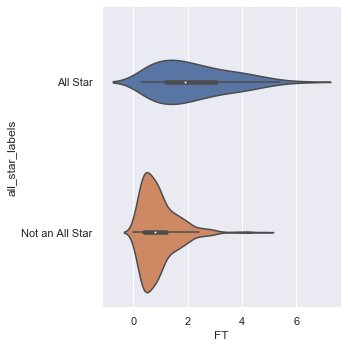

In [99]:
sns.catplot(x="FT", y="all_star_labels",
            kind="violin", data=df);

In [100]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['FT'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['FT']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.447
Pearsons correlation between belongs_to_collection and revenue: 0.402


## Free Throws Attempted (FTA)

In [101]:
df['FTA'].describe()

count    1065.000000
mean        1.447512
std         1.134463
min         0.000000
25%         0.700000
50%         1.100000
75%         1.900000
max         8.500000
Name: FTA, dtype: float64

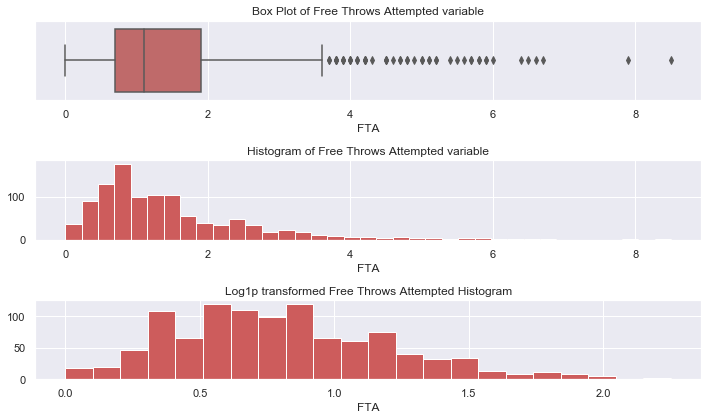

In [102]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['FTA'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Free Throws Attempted variable")
sns.distplot(a=df['FTA'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Free Throws Attempted variable")
sns.distplot(a=np.log1p(df['FTA']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Free Throws Attempted Histogram")
f.tight_layout()

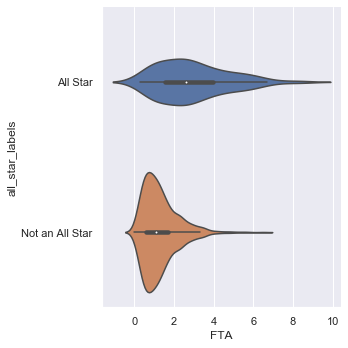

In [103]:
sns.catplot(x="FTA", y="all_star_labels",
            kind="violin", data=df);

In [104]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['FTA'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['FTA']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.445
Pearsons correlation between belongs_to_collection and revenue: 0.393


## Offensive Rebounds (ORB)

In [105]:
df['ORB'].describe()

count    1065.000000
mean        0.749390
std         0.660415
min         0.000000
25%         0.300000
50%         0.500000
75%         1.000000
max         4.300000
Name: ORB, dtype: float64

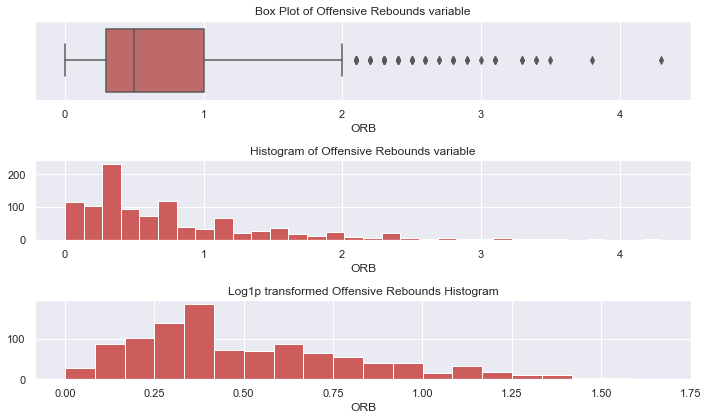

In [106]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['ORB'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Offensive Rebounds variable")
sns.distplot(a=df['ORB'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Offensive Rebounds variable")
sns.distplot(a=np.log1p(df['ORB']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Offensive Rebounds Histogram")
f.tight_layout()

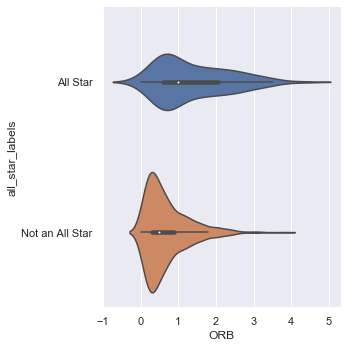

In [107]:
sns.catplot(x="ORB", y="all_star_labels",
            kind="violin", data=df);

In [108]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['ORB'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['ORB']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.328
Pearsons correlation between belongs_to_collection and revenue: 0.306


## Defensive Rebounds (DRB)

In [109]:
df['DRB'].describe()

count    1065.000000
mean        1.876995
std         1.257394
min         0.000000
25%         0.900000
50%         1.600000
75%         2.500000
max         8.800000
Name: DRB, dtype: float64

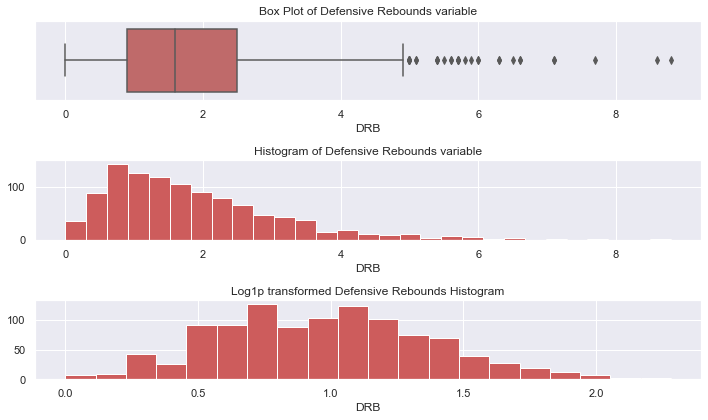

In [110]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['DRB'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Defensive Rebounds variable")
sns.distplot(a=df['DRB'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Defensive Rebounds variable")
sns.distplot(a=np.log1p(df['DRB']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Defensive Rebounds Histogram")
f.tight_layout()

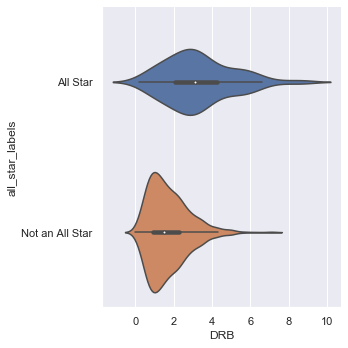

In [111]:
sns.catplot(x="DRB", y="all_star_labels",
            kind="violin", data=df);

In [112]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['DRB'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['DRB']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.386
Pearsons correlation between belongs_to_collection and revenue: 0.338


## Total Rebounds (TRB)

In [113]:
df['TRB'].describe()

count    1065.000000
mean        2.624319
std         1.822592
min         0.000000
25%         1.300000
50%         2.200000
75%         3.500000
max        12.100000
Name: TRB, dtype: float64

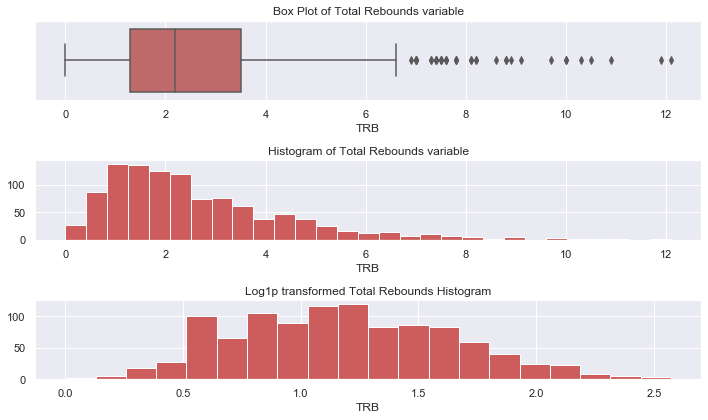

In [114]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['TRB'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Total Rebounds variable")
sns.distplot(a=df['TRB'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Total Rebounds variable")
sns.distplot(a=np.log1p(df['TRB']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Total Rebounds Histogram")
f.tight_layout()

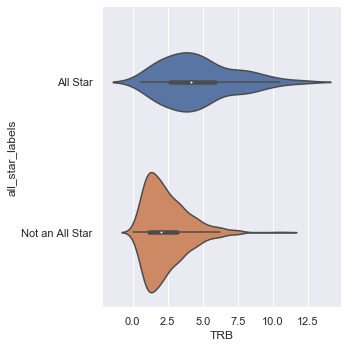

In [115]:
sns.catplot(x="TRB", y="all_star_labels",
            kind="violin", data=df);

In [116]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['TRB'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['TRB']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.384
Pearsons correlation between belongs_to_collection and revenue: 0.335


## Assists (AST)

In [123]:
df['AST'].describe()

count    1065.000000
mean        1.369296
std         1.339596
min         0.000000
25%         0.500000
50%         0.900000
75%         1.800000
max         8.300000
Name: AST, dtype: float64

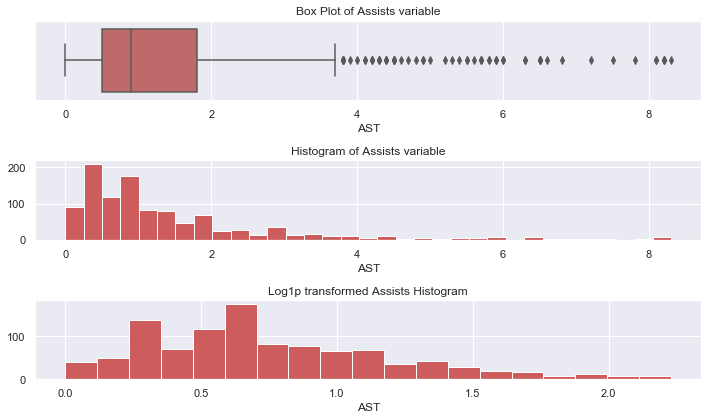

In [124]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['AST'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Assists variable")
sns.distplot(a=df['AST'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Assists variable")
sns.distplot(a=np.log1p(df['AST']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Assists Histogram")
f.tight_layout()

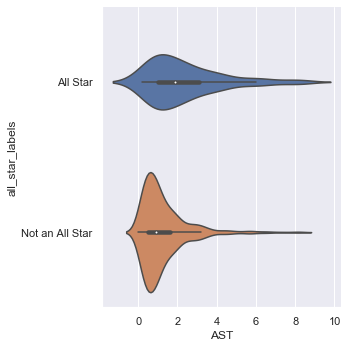

In [125]:
sns.catplot(x="AST", y="all_star_labels",
            kind="violin", data=df);

In [126]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['AST'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['AST']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.254
Pearsons correlation between belongs_to_collection and revenue: 0.248


## Steals (STL)

In [127]:
df['STL'].describe()

count    1065.000000
mean        0.542160
std         0.370096
min         0.000000
25%         0.300000
50%         0.500000
75%         0.700000
max         2.500000
Name: STL, dtype: float64

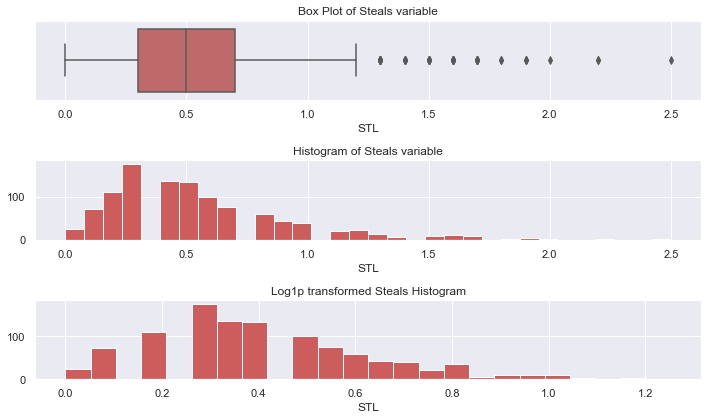

In [128]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['STL'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Steals variable")
sns.distplot(a=df['STL'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Steals variable")
sns.distplot(a=np.log1p(df['STL']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Steals Histogram")
f.tight_layout()

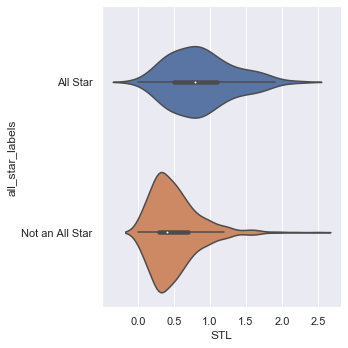

In [129]:
sns.catplot(x="STL", y="all_star_labels",
            kind="violin", data=df);

In [130]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['STL'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['STL']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.308
Pearsons correlation between belongs_to_collection and revenue: 0.301


## Blocks (BLK)

In [131]:
df['BLK'].describe()

count    1065.000000
mean        0.298310
std         0.347246
min         0.000000
25%         0.100000
50%         0.200000
75%         0.400000
max         2.500000
Name: BLK, dtype: float64

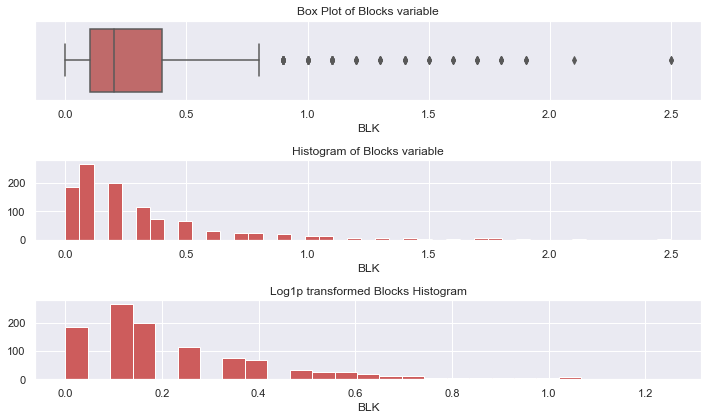

In [132]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['BLK'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Blocks variable")
sns.distplot(a=df['BLK'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Blocks variable")
sns.distplot(a=np.log1p(df['BLK']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Blocks Histogram")
f.tight_layout()

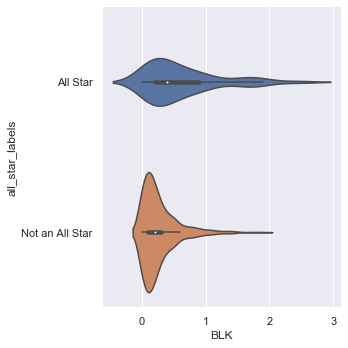

In [133]:
sns.catplot(x="BLK", y="all_star_labels",
            kind="violin", data=df);

In [134]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['BLK'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['BLK']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.319
Pearsons correlation between belongs_to_collection and revenue: 0.301


## Turnovers (TOV)

In [135]:
df['TOV'].describe()

count    1065.000000
mean        0.990047
std         0.657915
min         0.000000
25%         0.500000
50%         0.800000
75%         1.300000
max         4.000000
Name: TOV, dtype: float64

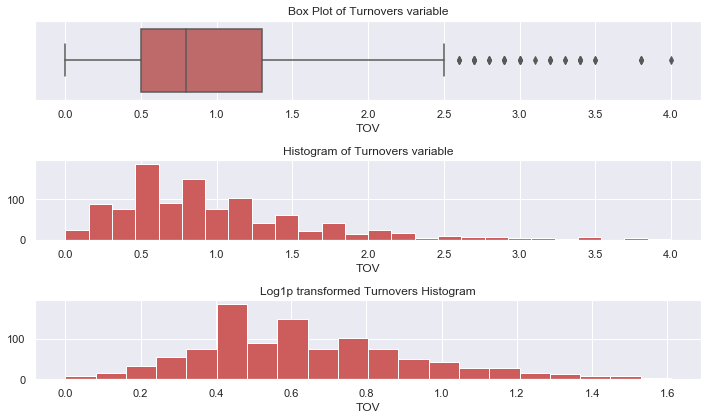

In [136]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['TOV'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Turnovers variable")
sns.distplot(a=df['TOV'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Turnovers variable")
sns.distplot(a=np.log1p(df['TOV']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Turnovers Histogram")
f.tight_layout()

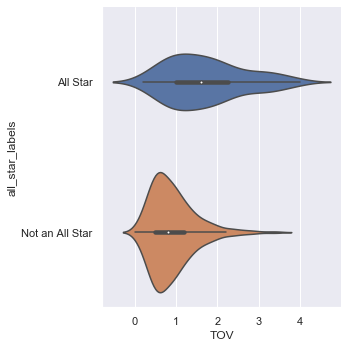

In [137]:
sns.catplot(x="TOV", y="all_star_labels",
            kind="violin", data=df);

In [138]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['TOV'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['TOV']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.374
Pearsons correlation between belongs_to_collection and revenue: 0.340


## Personal Fouls (PF)

In [139]:
df['PF'].describe()

count    1065.000000
mean        1.583474
std         0.770624
min         0.000000
25%         1.000000
50%         1.500000
75%         2.100000
max         4.100000
Name: PF, dtype: float64

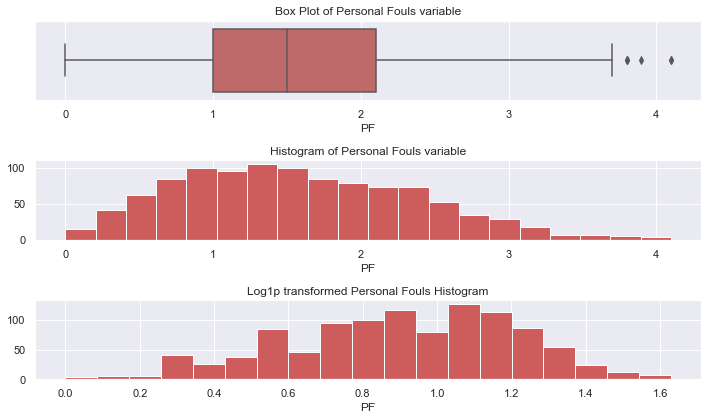

In [140]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['PF'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Personal Fouls variable")
sns.distplot(a=df['PF'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Personal Fouls variable")
sns.distplot(a=np.log1p(df['PF']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Personal Fouls Histogram")
f.tight_layout()

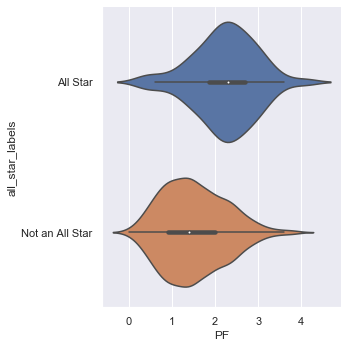

In [141]:
sns.catplot(x="PF", y="all_star_labels",
            kind="violin", data=df);

In [142]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['PF'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['PF']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.284
Pearsons correlation between belongs_to_collection and revenue: 0.263


## Points (PTS)

In [143]:
df['PTS'].describe()

count    1065.000000
mean        5.955023
std         3.908658
min         0.500000
25%         3.100000
50%         5.000000
75%         7.800000
max        22.500000
Name: PTS, dtype: float64

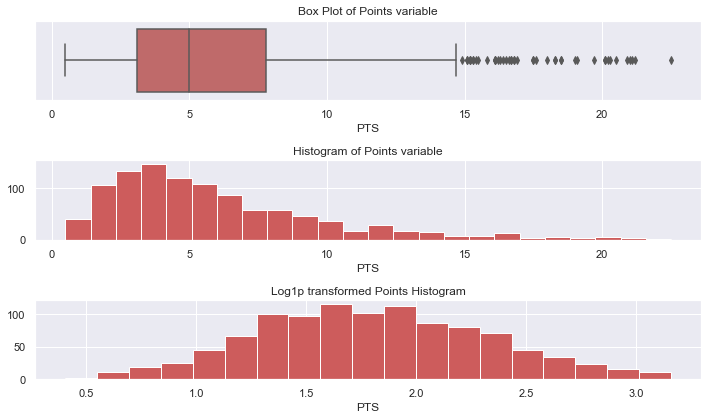

In [144]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['PTS'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Points variable")
sns.distplot(a=df['PTS'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Points variable")
sns.distplot(a=np.log1p(df['PTS']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Points Histogram")
f.tight_layout()

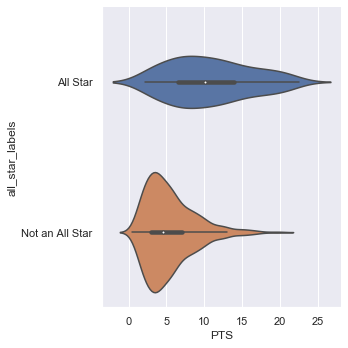

In [145]:
sns.catplot(x="PTS", y="all_star_labels",
            kind="violin", data=df);

In [146]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['PTS'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['PTS']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.418
Pearsons correlation between belongs_to_collection and revenue: 0.352


## Field Goal Percentage (FG%)

In [147]:
df['FG%'].describe()

count    1065.000000
mean        0.417749
std         0.071915
min         0.000000
25%         0.378000
50%         0.418000
75%         0.455000
max         0.750000
Name: FG%, dtype: float64

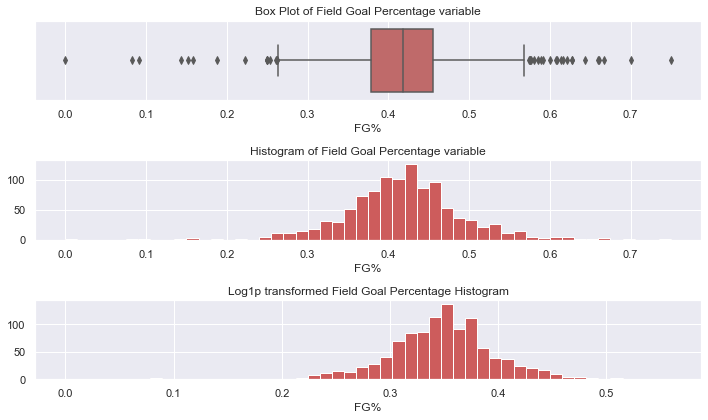

In [148]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['FG%'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Field Goal Percentage variable")
sns.distplot(a=df['FG%'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Field Goal Percentage variable")
sns.distplot(a=np.log1p(df['FG%']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Field Goal Percentage Histogram")
f.tight_layout()

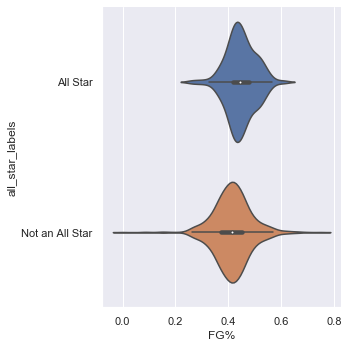

In [149]:
sns.catplot(x="FG%", y="all_star_labels",
            kind="violin", data=df);

In [150]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['FG%'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['FG%']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.137
Pearsons correlation between belongs_to_collection and revenue: 0.138


## 2 Point Field Goal Percentage (2P%)

In [154]:
df['2P%'].describe()

count    1065.000000
mean        0.451722
std         0.082741
min         0.000000
25%         0.409000
50%         0.451000
75%         0.496000
max         0.833000
Name: 2P%, dtype: float64

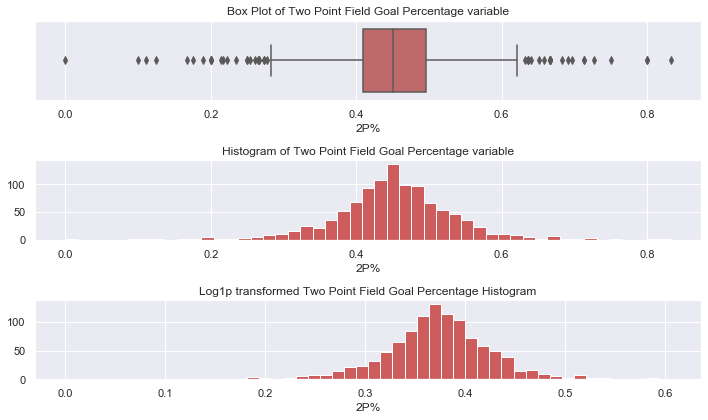

In [155]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['2P%'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Two Point Field Goal Percentage variable")
sns.distplot(a=df['2P%'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Two Point Field Goal Percentage variable")
sns.distplot(a=np.log1p(df['2P%']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Two Point Field Goal Percentage Histogram")
f.tight_layout()

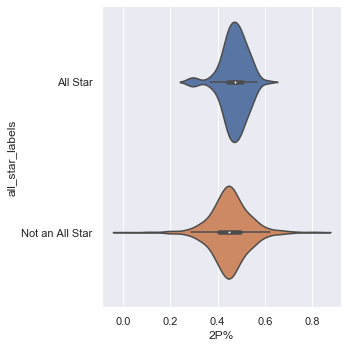

In [156]:
sns.catplot(x="2P%", y="all_star_labels",
            kind="violin", data=df);

In [157]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['2P%'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['2P%']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.073
Pearsons correlation between belongs_to_collection and revenue: 0.077


## 3 Point Field Goal Percentage (3FG%)

In [158]:
df['3P%'].describe()

count    1065.000000
mean        0.260141
std         0.152746
min         0.000000
25%         0.188000
50%         0.296000
75%         0.354000
max         1.000000
Name: 3P%, dtype: float64

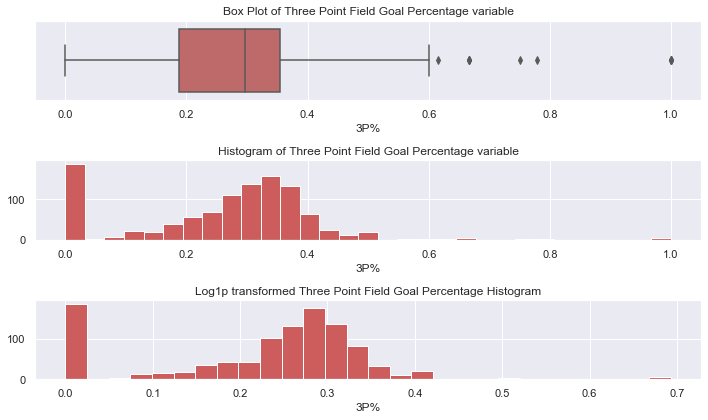

In [159]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['3P%'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Three Point Field Goal Percentage variable")
sns.distplot(a=df['3P%'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Three Point Field Goal Percentage variable")
sns.distplot(a=np.log1p(df['3P%']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Three Point Field Goal Percentage Histogram")
f.tight_layout()

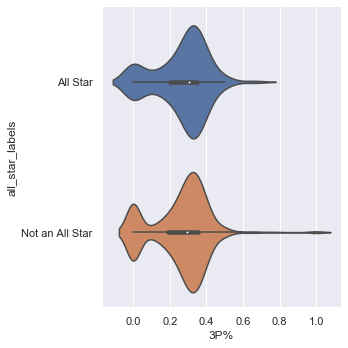

In [160]:
sns.catplot(x="3P%", y="all_star_labels",
            kind="violin", data=df);

In [161]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['3P%'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['3P%']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.010
Pearsons correlation between belongs_to_collection and revenue: 0.012


## Effective Field Goal Percentage (eFG%)

In [162]:
df['eFG%'].describe()

count    1065.000000
mean        0.457293
std         0.073493
min         0.000000
25%         0.420000
50%         0.460000
75%         0.500000
max         0.875000
Name: eFG%, dtype: float64

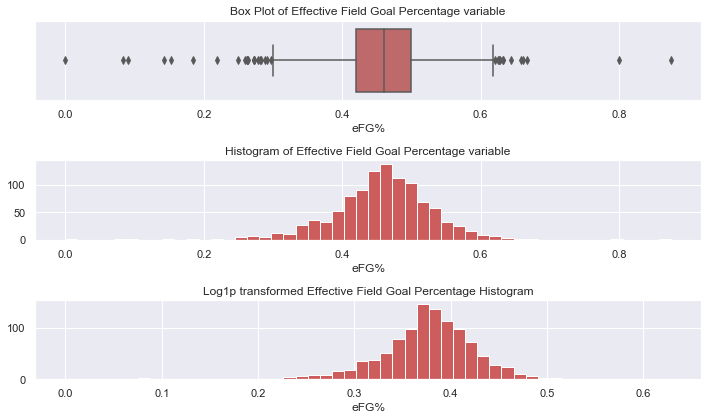

In [163]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['eFG%'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Effective Field Goal Percentage variable")
sns.distplot(a=df['eFG%'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Effective Field Goal Percentage variable")
sns.distplot(a=np.log1p(df['eFG%']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Effective Field Goal Percentage Histogram")
f.tight_layout()

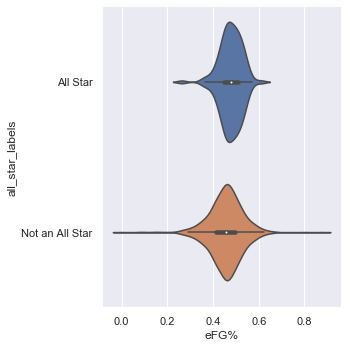

In [164]:
sns.catplot(x="eFG%", y="all_star_labels",
            kind="violin", data=df);

In [165]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['eFG%'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['eFG%']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.088
Pearsons correlation between belongs_to_collection and revenue: 0.090


## Free Throw Percentage (FT%)

In [166]:
df['FT%'].describe()

count    1065.000000
mean        0.717659
std         0.133578
min         0.000000
25%         0.656000
50%         0.727000
75%         0.796000
max         1.000000
Name: FT%, dtype: float64

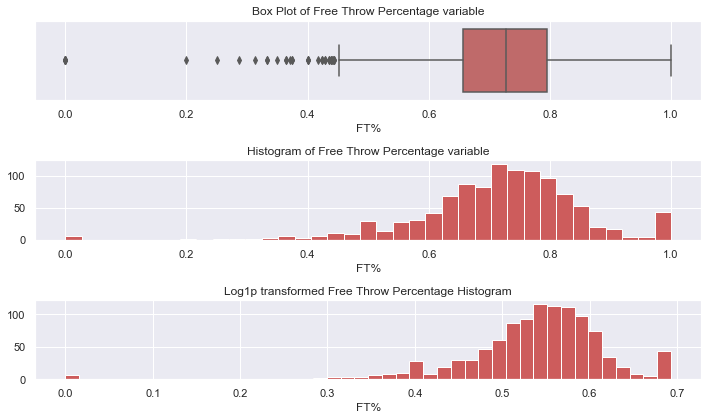

In [167]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['FT%'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Free Throw Percentage variable")
sns.distplot(a=df['FT%'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Free Throw Percentage variable")
sns.distplot(a=np.log1p(df['FT%']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Free Throw Percentage Histogram")
f.tight_layout()

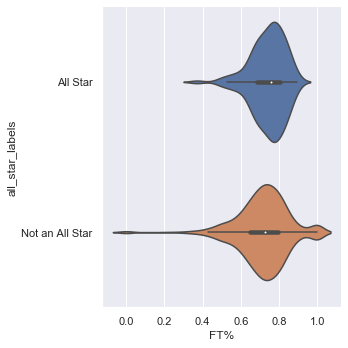

In [168]:
sns.catplot(x="FT%", y="all_star_labels",
            kind="violin", data=df);

In [169]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['FT%'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['FT%']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.058
Pearsons correlation between belongs_to_collection and revenue: 0.062


## Points Differential (PTS_diff)

In [189]:
df['PTS_diff'].describe()

count    1065.000000
mean        0.063286
std         3.521872
min       -13.500000
25%        -2.000000
50%         0.000000
75%         2.000000
max        12.000000
Name: PTS_diff, dtype: float64

In [190]:
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["PTS_diff"], how="all")

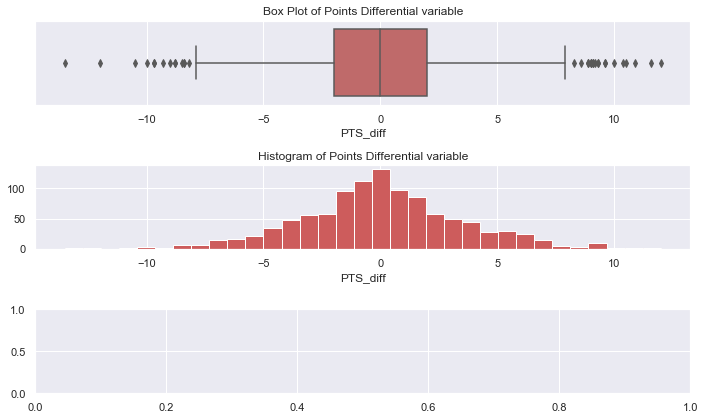

In [191]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['PTS_diff'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Points Differential variable")
sns.distplot(a=df['PTS_diff'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Points Differential variable")
#sns.distplot(a=np.log1p(df['PTS_diff']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
#ax[2].set_title("Log1p transformed Points Differential Histogram")
f.tight_layout()

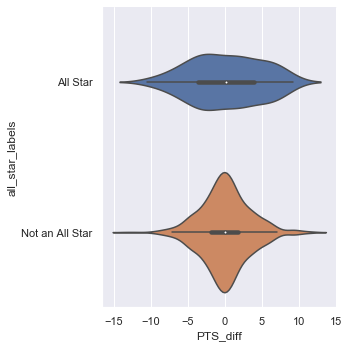

In [192]:
sns.catplot(x="PTS_diff", y="all_star_labels",
            kind="violin", data=df);

In [193]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['PTS_diff'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
#corr, _ = pearsonr(np.log1p(df['PTS_diff']), df['all_star'])
#print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.013


## Minutes Played Differential (MP_diff)

In [194]:
df['MP_diff'].describe()

count    1065.000000
mean        0.273991
std         7.586323
min       -22.500000
25%        -4.500000
50%         0.000000
75%         4.900000
max        32.000000
Name: MP_diff, dtype: float64

In [195]:
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["MP_diff"], how="all")

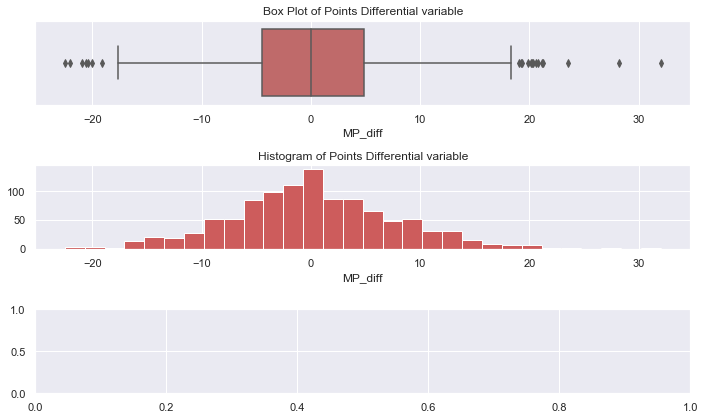

In [196]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['MP_diff'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Points Differential variable")
sns.distplot(a=df['MP_diff'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Points Differential variable")
#sns.distplot(a=np.log1p(df['PTS_diff']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
#ax[2].set_title("Log1p transformed Points Differential Histogram")
f.tight_layout()

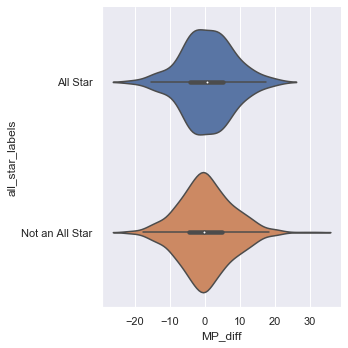

In [197]:
sns.catplot(x="MP_diff", y="all_star_labels",
            kind="violin", data=df);

In [198]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['MP_diff'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
#corr, _ = pearsonr(np.log1p(df['PTS_diff']), df['all_star'])
#print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.020
